In [102]:
pip install automata-lib pandas graphviz colormath pip install jupyterlab visual-automata

# ***Importação das classes***

In [103]:
from automata.fa.nfa import NFA 
from visual_automata.fa.nfa import VisualNFA 
from automata.fa.dfa import DFA 
from visual_automata.fa.dfa import VisualDFA 

# ***EXEMPLO 1***

# ***AFNe (Autômato finito não determinístico com movimentos vazios)***



In [104]:
afne1 = VisualNFA(
    states={"q0", "qf"}, #Estados da máquina
    input_symbols={"a", "b"}, #Símbolos que serão manipulados
    transitions={
        "q0": {"a": {"q0"}, "": {"qf"}},
        "qf": {"b": {"qf"}},
    }, #Transições
    initial_state="q0", #Estado inicial
    final_states={"qf"},#Estado final
)

In [105]:
#Gerar tabela de transições do AFNe
afne1.table

,a,b,λ
→q0,q0,∅,*qf
*qf,∅,*qf,∅


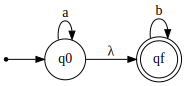

In [106]:
# Gerar diagrama ANFe
afne1.show_diagram()

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             a        →q0
2                →q0             a        *qf
3                *qf             b        *qf
4                *qf             b        *qf

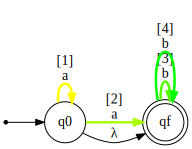

In [151]:
#Executar a paravra "aabb" no diagrama AFN
afne1.show_diagram ("aabb")

[Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             a        →q0
2                →q0             a        *qf
3                *qf             b        *qf
4                *qf             b        *qf
5                *qf             a          ∅

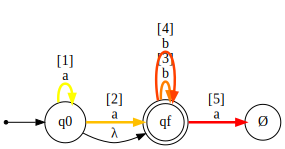

In [152]:
#Executar a paravra "aabba" no diagrama AFN
afne1.show_diagram ("aabba")

# ***AFN (Autômato finito não determinístico)***

In [108]:
#Eliminar transições vazias / Gerar AFN
afn1 = VisualNFA.eliminate_lambda(afne1)

In [109]:
#Gerar tabela de transições do AFN
afn1.table

,a,b
→q0,"{q0,*qf}",*qf
*qf,∅,*qf


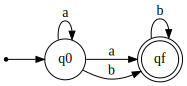

In [110]:
#Gerar diagrama AFN
afn1.show_diagram()

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             a        →q0
2                →q0             a        →q0
3                →q0             b        *qf
4                *qf             b        *qf

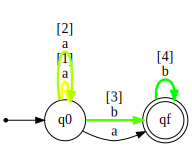

In [111]:
#Executar a paravra "aabb" no diagrama AFN
afn1.show_diagram ("aabb")

[Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             a        *qf
2                *qf             a          ∅

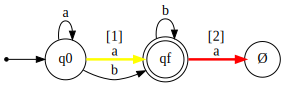

In [153]:
#Executar a paravra "aabba" no diagrama AFN
afn1.show_diagram ("aabba")

# ***AFD (Autômato finito determinístico)***

In [112]:
#Gerar AFD automata-lib a partir do AFN
afd1 = DFA.from_nfa(afn1)

In [113]:
#Converter AFD automata-lib em AFD Visual Automata
afd1 = VisualDFA(afd1)

In [114]:
#Gerar tabela de transições do AFD
afd1.table

,a,b
{},{},{}
→{q0},"*{q0,qf}",*{qf}
"*{q0,qf}","*{q0,qf}",*{qf}
*{qf},{},*{qf}


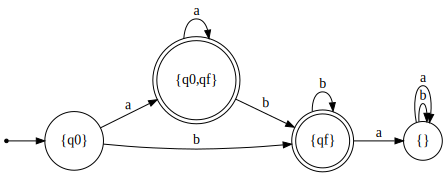

In [115]:
#Gerar diagrama AFD
afd1.show_diagram()

[Accepted]                         
Step: Current state: Input symbol: New state:
1              →{q0}             a   *{q0,qf}
2           *{q0,qf}             a   *{q0,qf}
3           *{q0,qf}             b      *{qf}
4              *{qf}             b      *{qf}

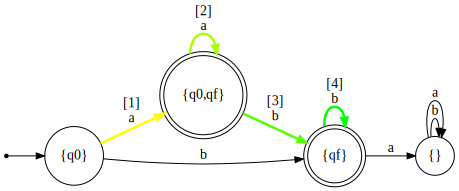

In [116]:
#Executar a paravra "aabb" no diagrama AFD
afd1.show_diagram("aabb")

[Rejected]                         
Step: Current state: Input symbol: New state:
1              →{q0}             a   *{q0,qf}
2           *{q0,qf}             a   *{q0,qf}
3           *{q0,qf}             b      *{qf}
4              *{qf}             b      *{qf}
5              *{qf}             a         {}

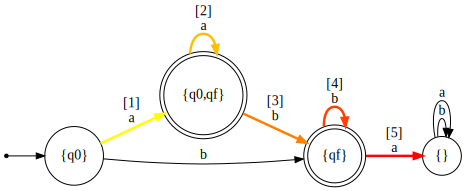

In [150]:
#Executar a paravra "aabba" no diagrama AFD
afd1.show_diagram("aabba")

# ***Exemplo 2***

# ***AFNe (Autômato finito não determinístico com movimentos vazios)***

In [117]:
afne2 = VisualNFA(
states={"q0", "q1", "q2"}, #Estados da máquina
input_symbols={"a", "b"}, #Símbolos que serão manipulados
transitions={
"q0": {"a": {"q0"}, "": {"q1"}},
"q1": {"b": {"q1"}, "": {"q2"}},
"q2": {"a": {"q2"}},
}, #Transições
initial_state="q0", #Estado inicial
final_states={"q2"}, #Estado final
)

In [118]:
#Gerar tabela de transições do AFNe
afne2.table

,a,b,λ
→q0,q0,∅,q1
q1,∅,q1,*q2
*q2,*q2,∅,∅


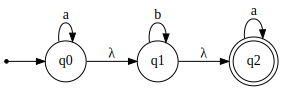

In [119]:
# Gerar diagrama ANFe
afne2.show_diagram()

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             a        →q0
2                →q0             a         q1
3                 q1             b         q1
4                 q1             b        *q2

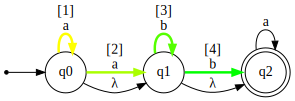

In [120]:
#Executar a paravra "aabb" no diagrama AFN
afne2.show_diagram ("aabb")

[Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             a        *q2
2                *q2             a        *q2
3                *q2             b          ∅

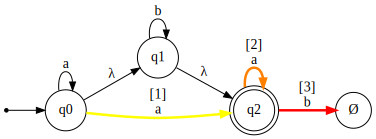

In [155]:
#Executar a paravra "aabbab" no diagrama AFN
afne2.show_diagram ("aabbab")

# ***AFN (Autômato finito não determinístico)***

In [121]:
#Eliminar transições vazias / Gerar AFN
afn2 = VisualNFA.eliminate_lambda(afne2)


In [122]:
#Gerar tabela de transições do AFN
afn2.table

,a,b
→q0,"{q0,q1,*q2}","{q1,*q2}"
q1,*q2,"{q1,*q2}"
*q2,*q2,∅


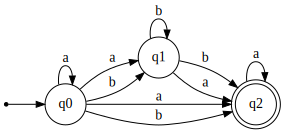

In [123]:
#Gerar diagrama AFN
afn2.show_diagram()

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             a        →q0
2                →q0             a         q1
3                 q1             b         q1
4                 q1             b        *q2

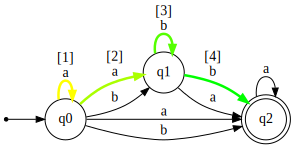

In [124]:
#Executar a paravra "aabb" no diagrama AFN
afn2.show_diagram ("aabb")

[Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             a        *q2
2                *q2             a        *q2
3                *q2             b          ∅

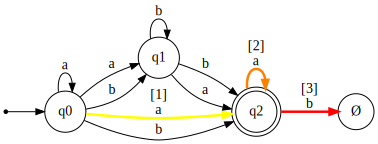

In [156]:
#Executar a paravra "aabbab" no diagrama AFN
afn2.show_diagram ("aabbab")

# ***AFD (Autômato finito determinístico)***

In [125]:
#Gerar AFD automata-lib a partir do AFN
afd2 = DFA.from_nfa(afn2)

In [126]:
#Converter AFD automata-lib em AFD Visual Automata
afd2 = VisualDFA(afd2)

In [127]:
#Gerar tabela de transições do AFD
afd2.table

,a,b
{},{},{}
→{q0},"*{q0,q1,q2}","*{q1,q2}"
"*{q0,q1,q2}","*{q0,q1,q2}","*{q1,q2}"
"*{q1,q2}",*{q2},"*{q1,q2}"
*{q2},*{q2},{}


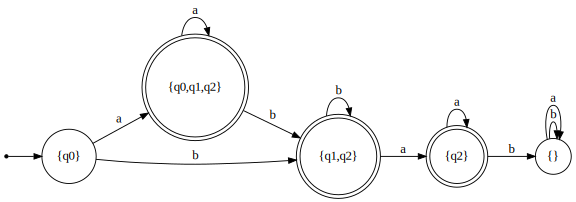

In [128]:
#Gerar diagrama AFD
afd2.show_diagram()

[Accepted]                           
Step: Current state: Input symbol:   New state:
1              →{q0}             a  *{q0,q1,q2}
2        *{q0,q1,q2}             a  *{q0,q1,q2}
3        *{q0,q1,q2}             b     *{q1,q2}
4           *{q1,q2}             b     *{q1,q2}

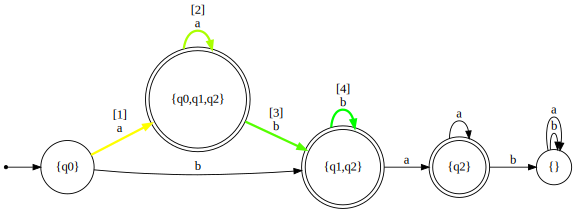

In [129]:
#Executar a paravra "aabb" no diagrama AFD
afd2.show_diagram("aabb")

[Rejected]                           
Step: Current state: Input symbol:   New state:
1              →{q0}             a  *{q0,q1,q2}
2        *{q0,q1,q2}             a  *{q0,q1,q2}
3        *{q0,q1,q2}             b     *{q1,q2}
4           *{q1,q2}             b     *{q1,q2}
5           *{q1,q2}             a        *{q2}
6              *{q2}             b           {}

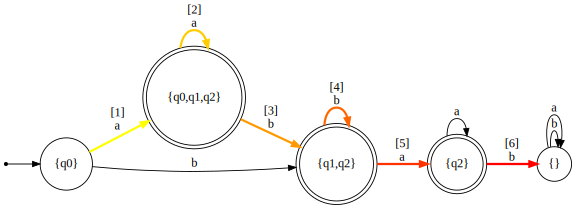

In [158]:
#Executar a paravra "aabbab" no diagrama AFD
afd2.show_diagram("aabbab")

# ***Exemplo 3***

# ***AFNe (Autômato finito não determinístico com movimentos vazios)***

In [130]:
afne3 = VisualNFA(
states={"q0", "q1", "q2", "q3"}, #Estados da máquina
input_symbols={"0", "1"}, #Símbolos que serão manipulados
transitions={
"q0": {"0": {"q1"}},
"q1": {"1": {"q2"}},
"q2": {"": {"q3"}},
"q3": {"": {"q0"}},
}, #Transições
initial_state="q0", #Estado inicial
final_states={"q3"}, #Estado final
)


In [131]:
#Gerar tabela de transições do AFNe
afne3.table

,0,1,λ
→q0,q1,∅,∅
q1,∅,q2,∅
q2,∅,∅,*q3
*q3,∅,∅,q0


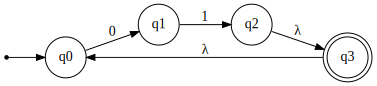

In [132]:
# Gerar diagrama ANFe
afne3.show_diagram()

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             0         q1
2                 q1             1        →q0
3                →q0             0         q1
4                 q1             1        →q0
5                →q0             0         q1
6                 q1             1        →q0
7                →q0             0         q1
8                 q1             1        *q3

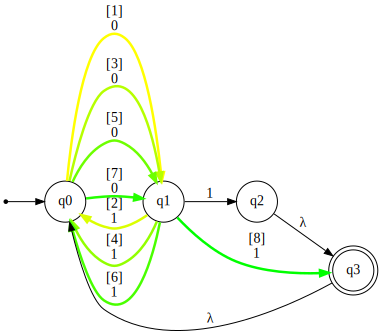

In [133]:
#Executar a paravra "01010101" no diagrama AFNe
afne3.show_diagram ("01010101")

[Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             0         q1
2                 q1             1         q2
3                 q2             1          ∅

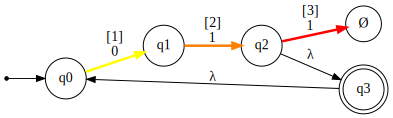

In [159]:
#Executar a paravra "01110101" no diagrama AFNe
afne3.show_diagram ("01110101")

# ***AFN (Autômato finito não determinístico)***

In [134]:
#Eliminar transições vazias / Gerar AFN
afn3 = VisualNFA.eliminate_lambda(afne3)

In [135]:
#Gerar tabela de transições do AFN
afn3.table

,0,1
→q0,q1,∅
q1,∅,"{q0,q2,*q3}"
q2,q1,∅
*q3,q1,∅


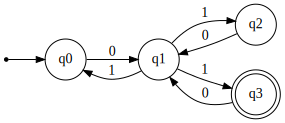

In [136]:
#Gerar diagrama AFN
afn3.show_diagram()

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             0         q1
2                 q1             1        *q3
3                *q3             0         q1
4                 q1             1        *q3
5                *q3             0         q1
6                 q1             1        *q3
7                *q3             0         q1
8                 q1             1        *q3

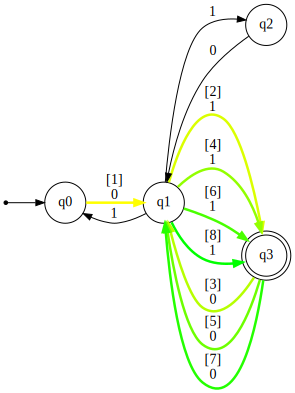

In [137]:
#Executar a paravra "01010101" no diagrama AFN
afn3.show_diagram ("01010101")

[Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             0         q1
2                 q1             1         q2
3                 q2             1          ∅

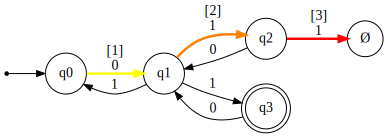

In [160]:
#Executar a paravra "01110101" no diagrama AFN
afn3.show_diagram ("01110101")

# ***AFD (Autômato finito determinístico)***

In [145]:
#Gerar AFD automata-lib a partir do AFN
afd3 = DFA.from_nfa(afn3)

In [146]:
#Converter AFD automata-lib em AFD Visual Automata
afd3 = VisualDFA(afd3)

In [147]:
#Gerar tabela de transições do AFD
afd3.table

,0,1
{},{},{}
→{q0},{q1},{}
"*{q0,q2,q3}",{q1},{}
{q1},{},"*{q0,q2,q3}"


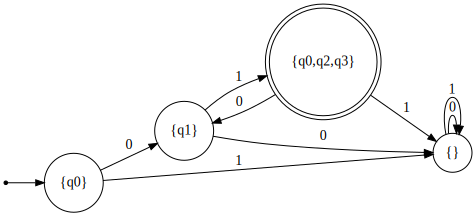

In [148]:
#Gerar diagrama AFD
afd3.show_diagram()

[Accepted]                           
Step: Current state: Input symbol:   New state:
1              →{q0}             0         {q1}
2               {q1}             1  *{q0,q2,q3}
3        *{q0,q2,q3}             0         {q1}
4               {q1}             1  *{q0,q2,q3}
5        *{q0,q2,q3}             0         {q1}
6               {q1}             1  *{q0,q2,q3}
7        *{q0,q2,q3}             0         {q1}
8               {q1}             1  *{q0,q2,q3}

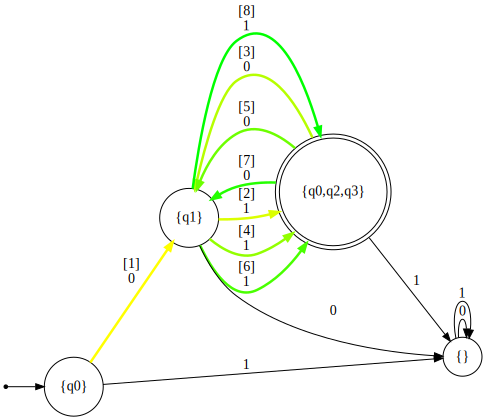

In [149]:
#Executar a paravra "01010101" no diagrama AFD
afd3.show_diagram("01010101")

[Rejected]                           
Step: Current state: Input symbol:   New state:
1              →{q0}             0         {q1}
2               {q1}             1  *{q0,q2,q3}
3        *{q0,q2,q3}             1           {}
4                 {}             1           {}
5                 {}             0           {}
6                 {}             1           {}
7                 {}             0           {}
8                 {}             1           {}

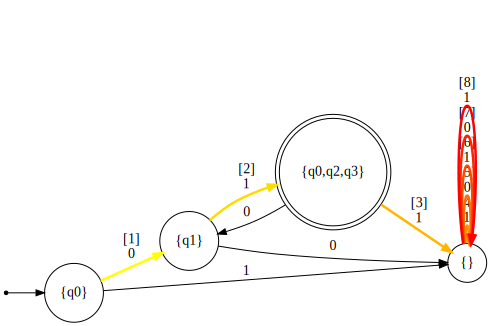

In [161]:
#Executar a paravra "01110101" no diagrama AFD
afd3.show_diagram("01110101")